In [71]:
!pip install yfinance
!mamba install bs4
!pip install requests
!pip install pandas
!pip install regex
!mamba install html5lib -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4']

pkgs/r/linux-64          [>                   ] (--:--) No change
pkgs/r/linux-64         

In [72]:
import yfinance as yf
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [111]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [112]:
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [142]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
table = soup.find(text = re.compile("Tesla Annual Revenue")).find_next('tbody')
tesla_revenue = pd.DataFrame(columns={'Date', 'Revenue'})

for row in table.find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    rev = col[1].text
    tesla_revenue = tesla_revenue.append({'Date': date, 'Revenue': rev}, ignore_index=True)

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$',"")
tesla_revenue.tail()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning:

The default value of regex will change from True to False in a future version.



,Revenue,Date
9,2013,2013
10,413,2012
11,204,2011
12,117,2010
13,112,2009


Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [143]:
gme = yf.Ticker('GME')
gme_data = gme.history(period='max')
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [144]:
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
table = soup.find(text = re.compile('GameStop Quarterly Revenue')).find_next('tbody')
gme_revenue = pd.DataFrame(columns={'Date', 'Revenue'})

for row in table.find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    rev = col[1].text
    gme_revenue = gme_revenue.append({'Date': date, 'Revenue': rev}, ignore_index=True)

gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$',"")
gme_revenue.tail()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning:

The default value of regex will change from True to False in a future version.



,Revenue,Date
51,3524,2010-01-31
52,1835,2009-10-31
53,1739,2009-07-31
54,1981,2009-04-30
55,3492,2009-01-31


Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

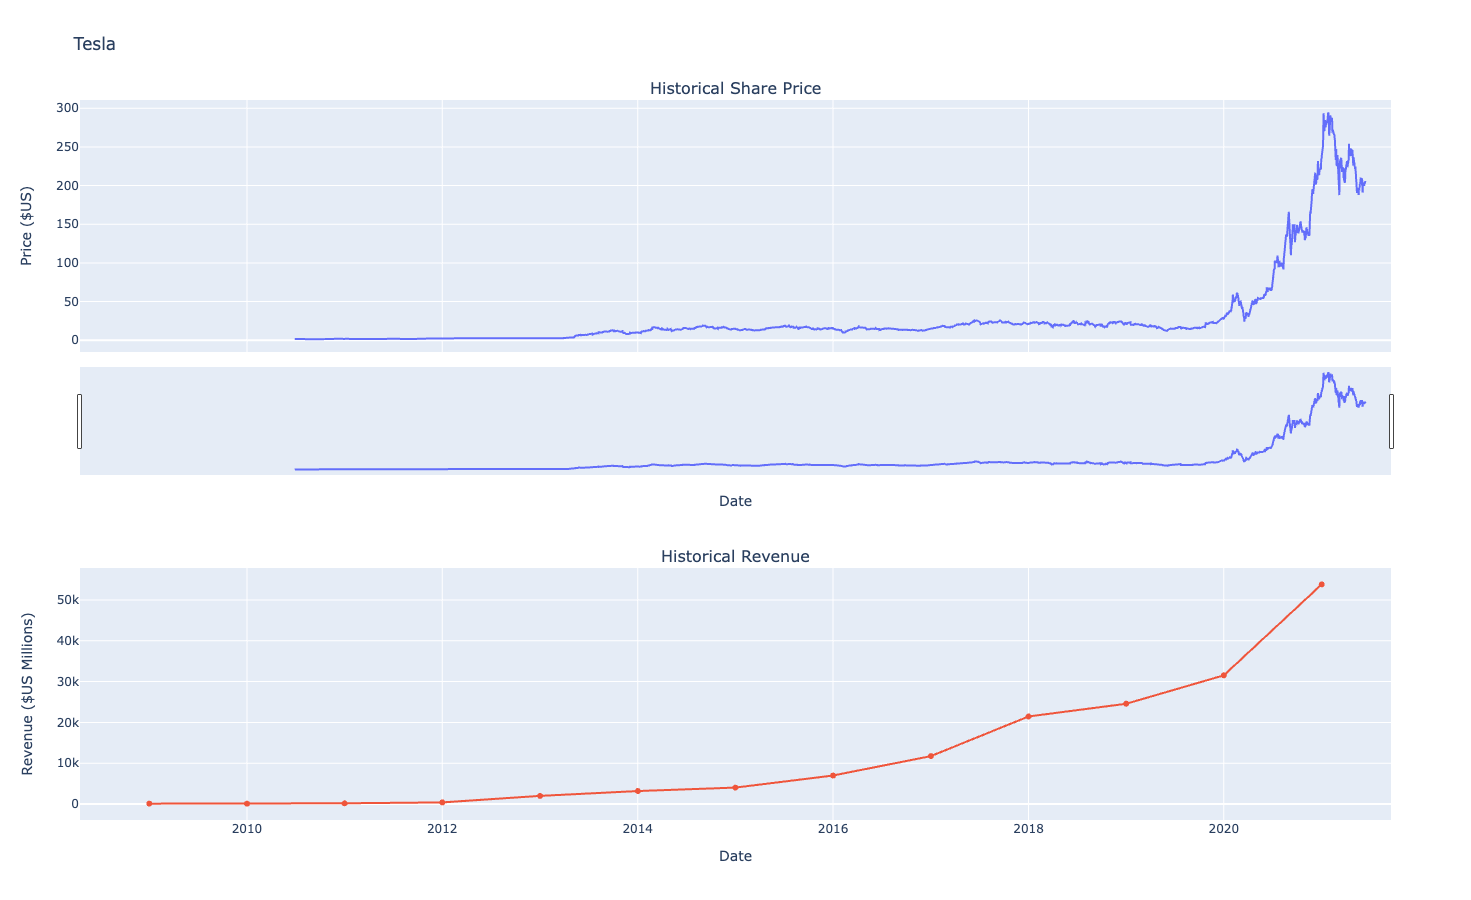

In [145]:
make_graph(tesla_data, tesla_revenue, "Tesla")

Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

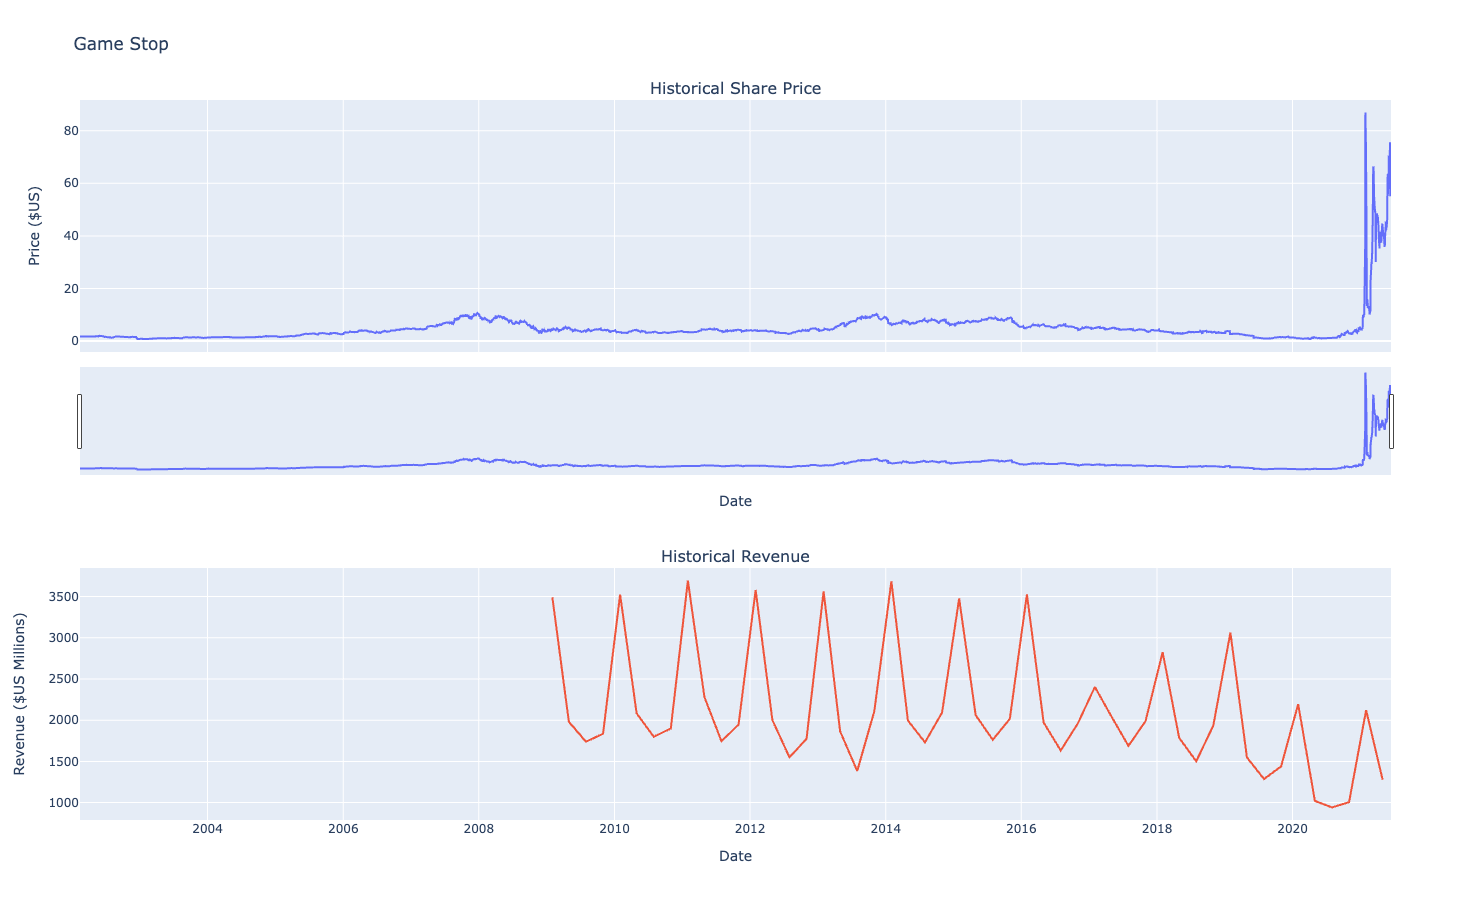

In [141]:
make_graph(gme_data, gme_revenue, 'Game Stop')

Question 7 - Sharing your Assignment Notebook - 2 Points